# Data Tidying
Data from https://www.kaggle.com/datasets/thedevastator/spanish-housing-dataset-location-size-price-and?select=zones.csv

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
random.seed(16)
from sklearn.model_selection import train_test_split
print('Libraries imported :)')

Libraries imported :)


In [2]:
# get list of all files in the dataset 
datafolder_name = "Full Dataset unmodified"
datafolder_path = os.path.join(os.getcwd(), datafolder_name)

file_names = os.listdir(datafolder_path)

# Filter for relavent files
cities_of_interest = ['alicante', 'girona', 'madrid', 'sevilla', 'valencia']
house_files = [os.path.join(datafolder_path, file) for file in file_names if file.startswith("houses_")]

house_files = [file for file in house_files for city in cities_of_interest if city in file]
house_files

['C:\\Users\\laure\\OneDrive - Imperial College London\\ME4\\Spring\\178 Statistics and Data Science for Engineers\\Project\\Full Dataset unmodified\\houses_alicante.csv',
 'C:\\Users\\laure\\OneDrive - Imperial College London\\ME4\\Spring\\178 Statistics and Data Science for Engineers\\Project\\Full Dataset unmodified\\houses_girona.csv',
 'C:\\Users\\laure\\OneDrive - Imperial College London\\ME4\\Spring\\178 Statistics and Data Science for Engineers\\Project\\Full Dataset unmodified\\houses_madrid.csv',
 'C:\\Users\\laure\\OneDrive - Imperial College London\\ME4\\Spring\\178 Statistics and Data Science for Engineers\\Project\\Full Dataset unmodified\\houses_sevilla.csv',
 'C:\\Users\\laure\\OneDrive - Imperial College London\\ME4\\Spring\\178 Statistics and Data Science for Engineers\\Project\\Full Dataset unmodified\\houses_valencia.csv']

## Take samples of each dataset
The datasets vary in sizes, and some are very large, so to be more manageable for this project random samples of a fixed size will taken of each file and saved in a new folder

In [3]:
def create_sample_csv(file_path, save_location, sample_size=1404, report=False):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    if len(df) < sample_size:
        sample_df = df
        print(f'{file_path} has fewer than {sample_size} rows')
    else:
        # Get a random sample
        sample_df = df.sample(n=sample_size, random_state=random.seed())
    
    # get save path and save the sample csv
    full_save_path = os.path.join(
    save_location,
    os.path.splitext(os.path.basename(file_path))[0] + "_sample" + os.path.splitext(file_path)[1]
)
    sample_df.to_csv(full_save_path, index=False)
    
    if report:
        print(f"A random sample of {sample_size} rows has been saved to {full_save_path}.")

In [4]:
save_location = os.path.join(os.getcwd(), 'Tidied data')

# take samples of all housing files
for file in house_files:
    create_sample_csv(file, save_location)

    
    ############## NOTE - I later decided to just keep all the data for now :o 
    ############## split it into training, validation and sample data later

## Load all the datasets
Load all the data samples into one dataframe

In [5]:
# empty dataframe
df = pd.DataFrame()
# initialize an empty list to store the dataframes
df_list = []

# append data from each sample file
for i, filename in enumerate(os.listdir(save_location)):
    if filename.endswith(".csv"):
        # read the csv file into a dataframe
        filepath = os.path.join(save_location, filename)
        temp_df = pd.read_csv(filepath).assign(city=cities_of_interest[i])
        # append the dataframe to the list
        df_list.append(temp_df)
        
# concatenate all the dataframes in the list
df = pd.concat(df_list, ignore_index=True)

In [6]:
df.describe()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished,city
count,6699,7020,7020,7020,7020,7020,7020,5813,2160,5119,...,7020,2517,7020,7020,7020,7020,7020,7020,14,7020
unique,6247,290,3,3,17,3,3,4,121,4,...,5,16,1351,3,20,3,3,3,1,5
top,"Residencial de 48 viviendas con garaje, traste...",Anuncio actualizado el 10 de abril,0,0,1,0,0,segunda mano/buen estado,1970,en trámite,...,2019-04-14,sur,150000,0,3,0,0,0,unfurnished,alicante
freq,29,329,4336,5948,2923,4168,6817,4770,89,2848,...,2803,777,111,6469,2800,4721,5116,3713,14,1404


## Select useful data

In [7]:
# calculate the proportion of missing values in each column
df.isna().mean().sort_values(ascending=False)

unfurnished          0.998006
ground_size          0.998006
kitchen              0.997721
heating              0.795299
loc_street           0.762393
construct_date       0.692308
garage               0.666524
orientation          0.641453
m2_useful            0.519658
loc_neigh            0.489886
lift                 0.426781
energetic_certif     0.270798
floor                0.244872
condition            0.171937
loc_district         0.076211
ad_description       0.045726
house_type           0.000000
obtention_date       0.000000
air_conditioner      0.000000
terrace              0.000000
swimming_pool        0.000000
storage_room         0.000000
room_num             0.000000
reduced_mobility     0.000000
price                0.000000
balcony              0.000000
bath_num             0.000000
house_id             0.000000
m2_real              0.000000
loc_zone             0.000000
built_in_wardrobe    0.000000
chimney              0.000000
loc_full             0.000000
garden    

In [8]:
# there is no need to keep columns with missing data as there is a sufficient number of complete columns to investigate
# drop columns that contain NaN values
df = df.dropna(axis=1)

# identify variables which are not relevant and drop the columns 
drop_columns = ['ad_last_update','loc_full', 'obtention_date']
df.drop(drop_columns, axis=1, inplace = True)

## Inspect selected data
The dataframe description below flags a few potential errors in the dataset that may need checking (these are only the ones I spotted there may be other problems)
 1. How are there 18 unique numbers of bathrooms, that is a ridiculus number of bathrooms
 2. Why is the most frequent house_id value 'house_id' 
 3. Why are there 72 different cities? Are there typos or spelling mistakes in the city names?
 4. Air conditioner, balcony, built in wardrobe, chimeney, garden, reduced mobility, swimming pool and terrace are all supposed to be boolean, how are there 5 unique values in each column?

In [9]:
df.head()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
0,1,0,2,0,0,0,84579626,Casa o chalet,La Nucia,"Marina Baixa, Alicante",170,220000,0,3,0,1,0,alicante
1,1,0,2,1,0,0,84320220,Piso,Sax,"Alt Vinalopó, Alicante",105,99900,1,3,1,0,0,alicante
2,0,0,2,0,0,0,39191716,Casa o chalet,Villena,"Alt Vinalopó, Alicante",146,55000,0,3,0,0,0,alicante
3,0,0,2,0,0,0,37468366,Piso,Biar,"Alt Vinalopó, Alicante",123,85000,0,4,1,0,0,alicante
4,0,0,3,0,0,1,81965216,Casa o chalet,La Nucia,"Marina Baixa, Alicante",250,270000,0,3,0,0,1,alicante


In [10]:
df.describe()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
count,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020
unique,3,3,17,3,3,3,7007,21,75,15,828,1351,3,20,3,3,3,5
top,0,0,1,0,0,0,house_id,Piso,Madrid,"Madrid capital, Madrid",90,150000,0,3,0,0,0,alicante
freq,4336,5948,2923,4168,6817,4988,14,3905,1320,1320,191,111,6469,2800,4721,5116,3713,1404


In [11]:
# check bathrooms
print(df['bath_num'].unique()) # based off this result check rooms too


print(df.dtypes)
# there are objects that need to be converted to int

['2' '3' '1' '5' '14' '4' '6' 'sin baños' 'bath_num' '7' '12' '13' '8' '9'
 '10' '75' '11']
air_conditioner      object
balcony              object
bath_num             object
built_in_wardrobe    object
chimney              object
garden               object
house_id             object
house_type           object
loc_city             object
loc_zone             object
m2_real              object
price                object
reduced_mobility     object
room_num             object
storage_room         object
swimming_pool        object
terrace              object
city                 object
dtype: object


In [12]:
# check house_id
df[df.house_id == 'house_id']

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
352,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,alicante
469,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,alicante
2084,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,girona
2520,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,girona
3430,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,madrid
3637,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,madrid
4276,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,sevilla
4511,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,sevilla
4787,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,sevilla
5178,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,sevilla


In [13]:
# check cities
print(df['loc_city'].value_counts())

# this is intresting that for some cities it seperates up, we will just use the city the file name states

Madrid                  1320
Roses                    831
Sagunto/Sagunt           664
La Nucia                 495
Villena                  427
                        ... 
Casas Altas                2
La Roda de Andalucia       1
Aguadulce                  1
Les Llosses                1
Pardines                   1
Name: loc_city, Length: 75, dtype: int64


In [14]:
# check house types
print(df['house_type'].value_counts())

Piso                                       3905
 Casa o chalet independiente                907
 Casa o chalet                              600
 Chalet adosado                             587
Ático                                       189
 Chalet pareado                             187
 Casa de pueblo                             181
Dúplex                                      144
Estudio                                     103
 Finca rústica                               82
 Casa rural                                  61
 Masía                                       27
Casa rural                                   21
house_type                                   14
 Cortijo                                      4
 Torre                                        2
 Casa terrera                                 2
 Caserón                                      1
 Castillo                                     1
Alquiler de Chalet adosado                    1
Alquiler de Casa o chalet independiente 

In [15]:
# check boolean values

bool_columns = ["air_conditioner", "balcony", "reduced_mobility", "storage_room", "swimming_pool", "terrace",
                "built_in_wardrobe", "chimney", "garden"]

for name in bool_columns:
    print(df[name].unique())

# well that looks a bit sketchy
# if all of the columns have things filled in with the column name we will need to drop them lol
# -- its probaby bc of the way i joined the datasets, there might be a row of column titles for each dataset

['1' '0' 'air_conditioner']
['0' '1' 'balcony']
['0' '1' 'reduced_mobility']
['0' '1' 'storage_room']
['1' '0' 'swimming_pool']
['0' '1' 'terrace']
['0' '1' 'built_in_wardrobe']
['0' '1' 'chimney']
['0' '1' 'garden']


## Fix issues found in data

In [16]:
# fix column names appearing in data
df.drop(df[df.house_id == 'house_id'].index, inplace=True)
df.describe()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
count,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006,7006
unique,2,2,16,2,2,2,7006,20,74,14,827,1350,2,19,2,2,2,5
top,0,0,1,0,0,0,84579626,Piso,Madrid,"Madrid capital, Madrid",90,150000,0,3,0,0,0,alicante
freq,4336,5948,2923,4168,6817,4988,1,3905,1320,1320,191,111,6469,2800,4721,5116,3713,1402


In [17]:
# fix problem with bools
for name in bool_columns:
    df[name].replace({'0': 0, '1': 1}, inplace = True)

df.describe(include='all')

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
count,7006.000000,7006.000000,7006,7006.000000,7006.000000,7006.000000,7006,7006,7006,7006,7006,7006,7006.000000,7006,7006.000000,7006.000000,7006.000000,7006
unique,NaN,NaN,16,NaN,NaN,NaN,7006,20,74,14,827,1350,NaN,19,NaN,NaN,NaN,5
top,NaN,NaN,1,NaN,NaN,NaN,84579626,Piso,Madrid,"Madrid capital, Madrid",90,150000,NaN,3,NaN,NaN,NaN,alicante
freq,NaN,NaN,2923,NaN,NaN,NaN,1,3905,1320,1320,191,111,NaN,2800,NaN,NaN,NaN,1402
mean,0.381102,0.151013,NaN,0.405081,0.026977,0.288039,NaN,NaN,NaN,NaN,NaN,NaN,0.076649,NaN,0.326149,0.269769,0.470026,NaN
std,0.485692,0.358088,NaN,0.490943,0.162027,0.452882,NaN,NaN,NaN,NaN,NaN,NaN,0.266052,NaN,0.468836,0.443871,0.499136,NaN
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
75%,1.000000,0.000000,NaN,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,1.000000,1.000000,NaN


In [18]:
# set strings to int

df['bath_num'].replace({'sin baños': 0}, inplace = True)
df['room_num'].replace({'sin habitación': 0}, inplace = True)

string_columns = ["bath_num", "room_num", "house_id", "m2_real", "price"]

for name in string_columns:
    df[name] = df[name].astype(int)
    
print(df.dtypes)
df.describe(include='all')

air_conditioner       int64
balcony               int64
bath_num              int32
built_in_wardrobe     int64
chimney               int64
garden                int64
house_id              int32
house_type           object
loc_city             object
loc_zone             object
m2_real               int32
price                 int32
reduced_mobility      int64
room_num              int32
storage_room          int64
swimming_pool         int64
terrace               int64
city                 object
dtype: object


,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,loc_city,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city
count,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7.006000e+03,7006,7006,7006,7006.000000,7.006000e+03,7006.000000,7006.000000,7006.000000,7006.000000,7006.000000,7006
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,74,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Piso,Madrid,"Madrid capital, Madrid",NaN,NaN,NaN,NaN,NaN,NaN,NaN,alicante
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3905,1320,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1402
mean,0.381102,0.151013,1.840565,0.405081,0.026977,0.288039,6.535702e+07,NaN,NaN,NaN,1475.450899,2.491717e+05,0.076649,3.119612,0.326149,0.269769,0.470026,NaN
std,0.485692,0.358088,1.322884,0.490943,0.162027,0.452882,2.492317e+07,NaN,NaN,NaN,19179.019812,3.752613e+05,0.266052,1.742272,0.468836,0.443871,0.499136,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996730e+05,NaN,NaN,NaN,1.000000,3.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.844307e+07,NaN,NaN,NaN,80.000000,9.500000e+04,0.000000,2.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.266238e+07,NaN,NaN,NaN,110.000000,1.581950e+05,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,8.438650e+07,NaN,NaN,NaN,200.000000,2.540000e+05,0.000000,4.000000,1.000000,1.000000,1.000000,NaN


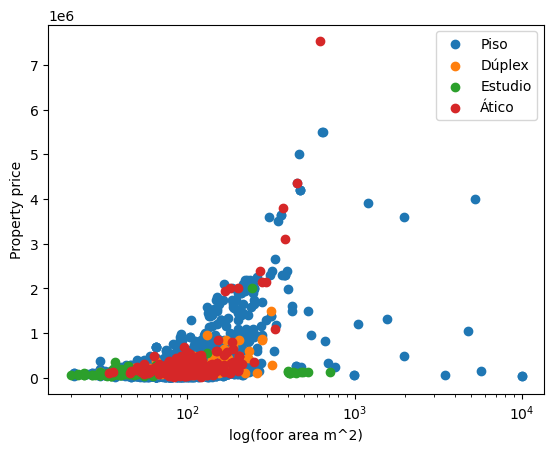

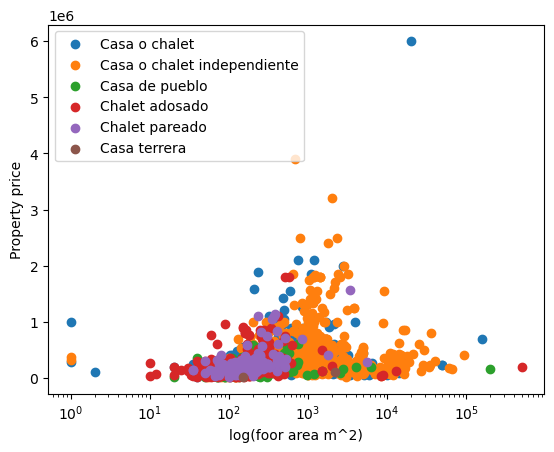

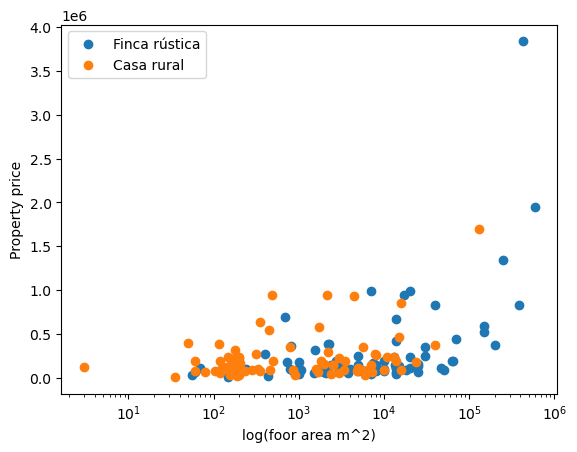

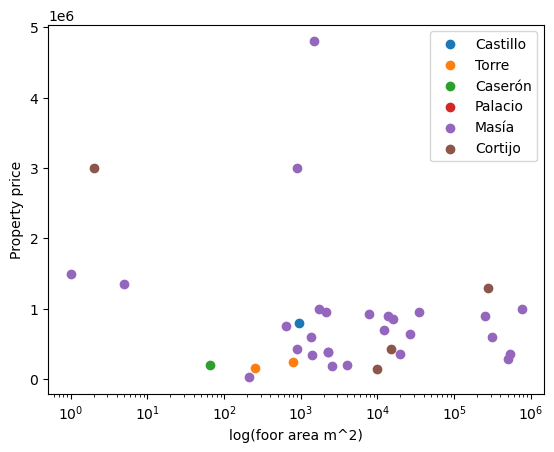

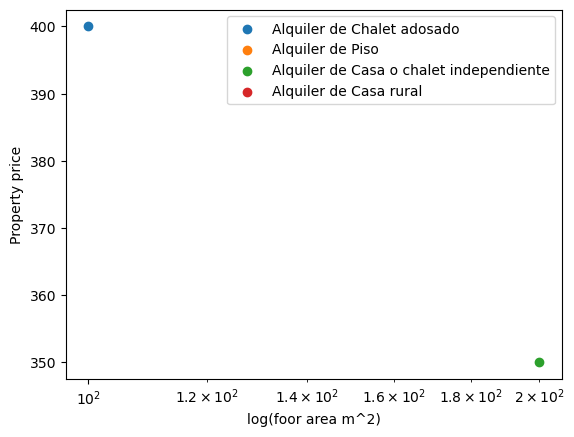

In [19]:
# fix string spaces
df['house_type'] = df['house_type'].str.lstrip()

# for simplicity we will group the types as apartment, house or luxury house
# (reducing cardinality so we can one hot encode it)
apartment = ["Piso", 'Dúplex', 'Estudio', 'Ático']
house = ['Casa o chalet', 'Casa o chalet independiente', 'Casa de pueblo', 
         'Chalet adosado', 'Chalet pareado', 'Casa terrera']
rural_property = ['Finca rústica', 'Casa rural']
lux_property = ['Castillo', 'Torre', 'Caserón', 'Palacio', 'Masía', 'Cortijo']
rental = ['Alquiler de Chalet adosado','Alquiler de Piso', 
          'Alquiler de Casa o chalet independiente', 'Alquiler de Casa rural']

property_types = [apartment, house, rural_property, lux_property, rental]

for p_type in property_types:
    for ihouse in p_type:
        df_temp = df[df['house_type']==ihouse]
        plt.scatter(df_temp['m2_real'], df_temp['price'], label=ihouse)

    plt.xscale('log')
    plt.xlabel('log(foor area m^2)')
    plt.ylabel('Property price')   
    plt.legend()
    plt.show()


In [20]:
# create the replacement dictionaries
apartment_dict = {k: 'apartment' for k in apartment}
house_dict = {k: 'house' for k in house}
rural_property_dict = {k: 'rural_property' for k in rural_property}
lux_property_dict = {k: 'lux_property' for k in lux_property}
rental_dict = {k: 'rental' for k in rental}

# replace the labels
df['house_type'].replace(apartment_dict,  inplace = True)
df['house_type'].replace(house_dict,  inplace = True)
df['house_type'].replace(rural_property_dict,  inplace = True)
df['house_type'].replace(lux_property_dict,  inplace = True)
df['house_type'].replace(rental_dict,  inplace = True)
   
# drop the rental properties
df.drop(df[df.house_type == 'rental'].index, inplace=True)
df.house_type.value_counts()

# one-hot encode house_type column
one_hot = pd.get_dummies(df['house_type'])

# concatenate the one-hot encoded column to the original dataframe
df = pd.concat([df, one_hot], axis=1)

# print the updated dataframe
df.describe()


,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,apartment,house,lux_property,rural_property
count,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7.004000e+03,7004.000000,7.004000e+03,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000
mean,0.381211,0.151057,1.840520,0.405054,0.026985,0.288121,6.535807e+07,1475.829383,2.492428e+05,0.076670,3.119646,0.326242,0.269846,0.470017,0.619789,0.351799,0.004997,0.023415
std,0.485719,0.358130,1.322963,0.490938,0.162050,0.452920,2.492406e+07,19181.745202,3.752913e+05,0.266087,1.742520,0.468871,0.443911,0.499136,0.485473,0.477566,0.070519,0.151229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996730e+05,1.000000,7.480000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.844135e+07,80.000000,9.500000e+04,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.266238e+07,110.000000,1.583450e+05,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,8.438700e+07,200.000000,2.542250e+05,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,75.000000,1.000000,1.000000,1.000000,8.507379e+07,760000.000000,7.525000e+06,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# drop data that we cannot easily use
df.drop(['loc_city', 'loc_zone'], axis=1, inplace=True)
df.describe(include='all')

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,house_type,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,city,apartment,house,lux_property,rural_property
count,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7.004000e+03,7004,7004.000000,7.004000e+03,7004.000000,7004.000000,7004.000000,7004.000000,7004.000000,7004,7004.000000,7004.000000,7004.000000,7004.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alicante,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1402,NaN,NaN,NaN,NaN
mean,0.381211,0.151057,1.840520,0.405054,0.026985,0.288121,6.535807e+07,NaN,1475.829383,2.492428e+05,0.076670,3.119646,0.326242,0.269846,0.470017,NaN,0.619789,0.351799,0.004997,0.023415
std,0.485719,0.358130,1.322963,0.490938,0.162050,0.452920,2.492406e+07,NaN,19181.745202,3.752913e+05,0.266087,1.742520,0.468871,0.443911,0.499136,NaN,0.485473,0.477566,0.070519,0.151229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.996730e+05,NaN,1.000000,7.480000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.844135e+07,NaN,80.000000,9.500000e+04,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.266238e+07,NaN,110.000000,1.583450e+05,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,8.438700e+07,NaN,200.000000,2.542250e+05,0.000000,4.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000


## Export cleaned and combined dataset

In [22]:
df.to_csv('five_city_clean_data.csv', index=False)

In [23]:
## split validation data to be used at end off dataset
# split so same proportion of each city 
val_df = pd.DataFrame()
for city in df['city'].unique():
    city_rows = df[df["city"] == city]
    # Sample the rows and add them to the sampled dataframe
    sampled_rows = city_rows.sample(frac=0.1, replace=False, random_state=16)
    val_df = pd.concat([val_df, sampled_rows])
# remove validation data
df = df.drop(val_df.index)

# split features and target
X_val = val_df.drop('price', axis=1)
y_val = val_df['price']
X = df.drop('price', axis=1)
y = df['price']
    
# split train test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

(6304, 20)

In [30]:
# save files 

X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_train.csv', index=False)

## Visulisations for context

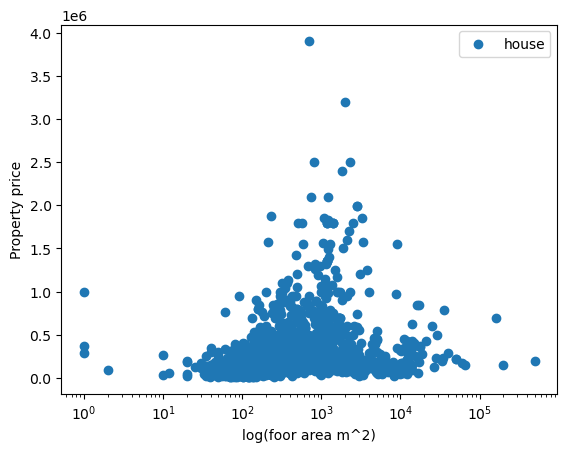

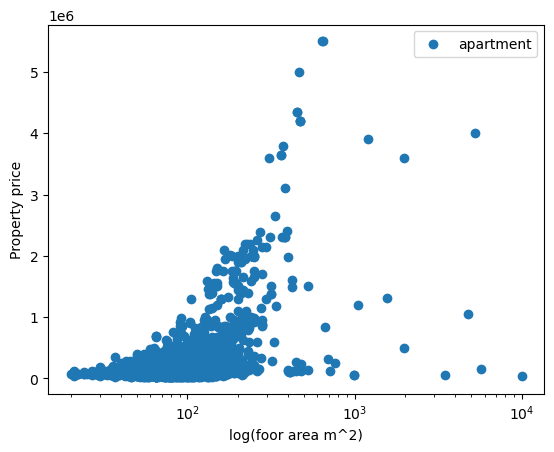

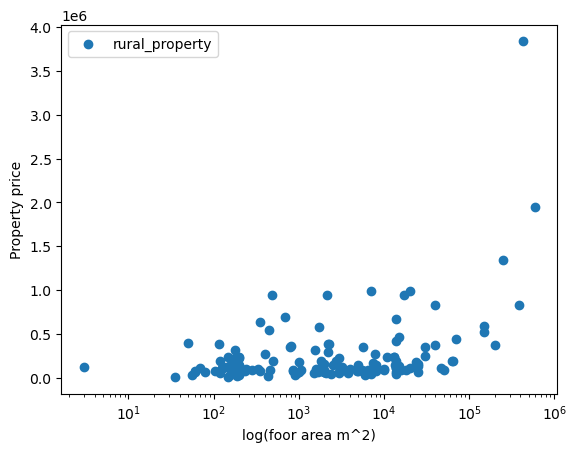

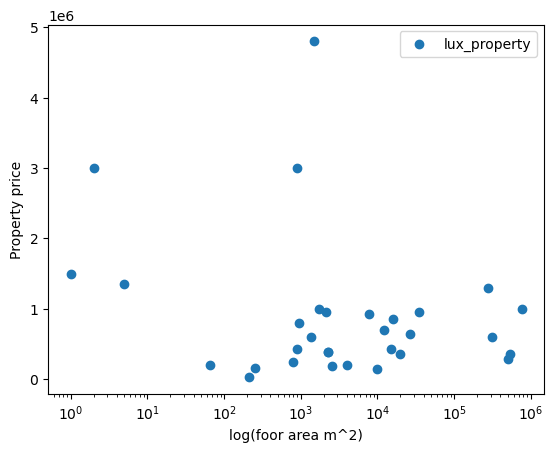

In [24]:
for house in df['house_type'].unique():
    df_temp = df[df['house_type']==house]
    plt.scatter(df_temp['m2_real'], df_temp['price'], label=house)

    plt.xscale('log')
    plt.xlabel('log(foor area m^2)')
    plt.ylabel('Property price')   
    plt.legend()
    plt.show()